In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time

# Import API key
import api_keys

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

626

## Perform API Calls

In [3]:
# OpenWeatherMap API Key
api_key = api_keys.api_key

# Starting URL for Weather Map API Call
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + api_key 

df = pd.DataFrame(cities)

# Create blank columns for the necessary fields.
df["Latitude"] = ""
df["Longitude"] = ""
df["Temperature"] = ""
df["Humidity"] = ""
df["Cloudiness"] = ""
df["Wind Speed"] = ""
df.columns = ['City', 'Latitude', 'Longitude', 'Temperature', 'Humidity', 'Cloudiness', 'Wind Speed']
df.head()

,City,Latitude,Longitude,Temperature,Humidity,Cloudiness,Wind Speed
0,punta arenas,,,,,,
1,marcona,,,,,,
2,tasbuget,,,,,,
3,shimoda,,,,,,
4,muana,,,,,,


In [4]:
# row counter
counter = 0

#loop
for index, row in df.iterrows():
#     time.sleep(1)
    
    query_url = url + "&q=" + row['City'].replace(" ","+")
    #Print log to ensure the loop is working correctly.
    
    print("Now retieving city # " + str(counter))
    print(query_url)
    counter = counter + 1
    
        #Run requests to grab the JSON at the requested URL
    
    city_weather = requests.get(query_url).json()
    
    
    #print(row["Latitude"],row["Longitude"])
#print(city_weather.keys())
    
    #Append the weather data to the appropriate columns.
    #Use try/except to skip any cities with errors.
    #selected_cities.append(requests.get(query_url + str(city_weather)).json())
    try:
        lat = city_weather['coord']['lat']
        lon = city_weather['coord']['lon']
        temperature = city_weather["main"]["temp"]
        humidity = city_weather["main"]["humidity"]
        cloudiness = city_weather["clouds"]["all"]
        wind_speed = city_weather["wind"]["speed"]
        
        df.set_value(index, "Latitude", lat)
        df.set_value(index, "Longitude", lon)
        df.set_value(index, "Temperature", temperature)
        df.set_value(index,"Humidity", humidity)
        df.set_value(index,"Cloudiness", cloudiness)
        df.set_value(index,"Wind Speed", wind_speed)
    except:
        print("Error with weather data, skipping.")

Now retieving city # 0
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=f6aee22a86423ca479b4c50c1be24520&q=punta+arenas


C:\Users\ryanw\Anaconda3\envs\pythondata\lib\site-packages\ipykernel\__main__.py:34: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
C:\Users\ryanw\Anaconda3\envs\pythondata\lib\site-packages\ipykernel\__main__.py:35: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
C:\Users\ryanw\Anaconda3\envs\pythondata\lib\site-packages\ipykernel\__main__.py:36: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
C:\Users\ryanw\Anaconda3\envs\pythondata\lib\site-packages\ipykernel\__main__.py:37: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
C:\Users\ryanw\Anaconda3\envs\pythondata\lib\site-packages\ipykernel\__main__.py:38: FutureWarning: set_value is deprecated and will be removed in a future rele

Now retieving city # 1
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=f6aee22a86423ca479b4c50c1be24520&q=marcona
Error with weather data, skipping.
Now retieving city # 2
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=f6aee22a86423ca479b4c50c1be24520&q=tasbuget
Error with weather data, skipping.
Now retieving city # 3
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=f6aee22a86423ca479b4c50c1be24520&q=shimoda
Now retieving city # 4
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=f6aee22a86423ca479b4c50c1be24520&q=muana
Now retieving city # 5
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=f6aee22a86423ca479b4c50c1be24520&q=thompson
Now retieving city # 6
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=f6aee22a86423ca479b4c50c1be24520&q=fare
Now retieving city # 7
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=f6aee22a86423ca479b4c50c1be24520&q=por

Now retieving city # 60
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=f6aee22a86423ca479b4c50c1be24520&q=butaritari
Now retieving city # 61
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=f6aee22a86423ca479b4c50c1be24520&q=puerto+ayora
Now retieving city # 62
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=f6aee22a86423ca479b4c50c1be24520&q=gawler
Now retieving city # 63
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=f6aee22a86423ca479b4c50c1be24520&q=mata+de+platano
Now retieving city # 64
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=f6aee22a86423ca479b4c50c1be24520&q=taolanaro
Error with weather data, skipping.
Now retieving city # 65
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=f6aee22a86423ca479b4c50c1be24520&q=touros
Now retieving city # 66
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=f6aee22a86423ca479b4c50c1be24520&q=geraldton
No

Now retieving city # 119
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=f6aee22a86423ca479b4c50c1be24520&q=anadyr
Now retieving city # 120
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=f6aee22a86423ca479b4c50c1be24520&q=illoqqortoormiut
Error with weather data, skipping.
Now retieving city # 121
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=f6aee22a86423ca479b4c50c1be24520&q=the+valley
Now retieving city # 122
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=f6aee22a86423ca479b4c50c1be24520&q=norman+wells
Now retieving city # 123
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=f6aee22a86423ca479b4c50c1be24520&q=atuona
Now retieving city # 124
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=f6aee22a86423ca479b4c50c1be24520&q=libertador+general+san+martin
Now retieving city # 125
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=f6aee22a86423ca479b

Now retieving city # 178
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=f6aee22a86423ca479b4c50c1be24520&q=cabo+san+lucas
Now retieving city # 179
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=f6aee22a86423ca479b4c50c1be24520&q=lorengau
Now retieving city # 180
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=f6aee22a86423ca479b4c50c1be24520&q=mayor+pablo+lagerenza
Now retieving city # 181
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=f6aee22a86423ca479b4c50c1be24520&q=upernavik
Now retieving city # 182
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=f6aee22a86423ca479b4c50c1be24520&q=lasa
Now retieving city # 183
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=f6aee22a86423ca479b4c50c1be24520&q=ostersund
Now retieving city # 184
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=f6aee22a86423ca479b4c50c1be24520&q=utiroa
Error with weather data, s

Error with weather data, skipping.
Now retieving city # 238
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=f6aee22a86423ca479b4c50c1be24520&q=srednekolymsk
Now retieving city # 239
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=f6aee22a86423ca479b4c50c1be24520&q=kitangari
Now retieving city # 240
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=f6aee22a86423ca479b4c50c1be24520&q=yar-sale
Now retieving city # 241
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=f6aee22a86423ca479b4c50c1be24520&q=port-gentil
Now retieving city # 242
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=f6aee22a86423ca479b4c50c1be24520&q=maple+creek
Now retieving city # 243
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=f6aee22a86423ca479b4c50c1be24520&q=bargal
Error with weather data, skipping.
Now retieving city # 244
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=f6aee

Error with weather data, skipping.
Now retieving city # 297
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=f6aee22a86423ca479b4c50c1be24520&q=krasnoznamensk
Now retieving city # 298
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=f6aee22a86423ca479b4c50c1be24520&q=zastron
Now retieving city # 299
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=f6aee22a86423ca479b4c50c1be24520&q=kiama
Now retieving city # 300
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=f6aee22a86423ca479b4c50c1be24520&q=chuy
Now retieving city # 301
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=f6aee22a86423ca479b4c50c1be24520&q=leningradskiy
Now retieving city # 302
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=f6aee22a86423ca479b4c50c1be24520&q=nieuw+nickerie
Now retieving city # 303
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=f6aee22a86423ca479b4c50c1be24520&q=mayna


Now retieving city # 356
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=f6aee22a86423ca479b4c50c1be24520&q=tasiilaq
Now retieving city # 357
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=f6aee22a86423ca479b4c50c1be24520&q=xining
Now retieving city # 358
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=f6aee22a86423ca479b4c50c1be24520&q=omealca
Now retieving city # 359
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=f6aee22a86423ca479b4c50c1be24520&q=deyang
Now retieving city # 360
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=f6aee22a86423ca479b4c50c1be24520&q=bilibino
Now retieving city # 361
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=f6aee22a86423ca479b4c50c1be24520&q=dunedin
Now retieving city # 362
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=f6aee22a86423ca479b4c50c1be24520&q=panalingaan
Now retieving city # 363
http://api.openweat

Now retieving city # 415
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=f6aee22a86423ca479b4c50c1be24520&q=doorn
Now retieving city # 416
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=f6aee22a86423ca479b4c50c1be24520&q=ostrovnoy
Now retieving city # 417
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=f6aee22a86423ca479b4c50c1be24520&q=kastamonu
Now retieving city # 418
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=f6aee22a86423ca479b4c50c1be24520&q=korla
Error with weather data, skipping.
Now retieving city # 419
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=f6aee22a86423ca479b4c50c1be24520&q=ca+mau
Now retieving city # 420
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=f6aee22a86423ca479b4c50c1be24520&q=fortuna
Now retieving city # 421
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=f6aee22a86423ca479b4c50c1be24520&q=gat
Now retieving city

Now retieving city # 473
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=f6aee22a86423ca479b4c50c1be24520&q=bandarbeyla
Now retieving city # 474
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=f6aee22a86423ca479b4c50c1be24520&q=sibolga
Now retieving city # 475
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=f6aee22a86423ca479b4c50c1be24520&q=lagoa
Now retieving city # 476
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=f6aee22a86423ca479b4c50c1be24520&q=lake+shore
Now retieving city # 477
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=f6aee22a86423ca479b4c50c1be24520&q=hanmer+springs
Now retieving city # 478
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=f6aee22a86423ca479b4c50c1be24520&q=zaria
Now retieving city # 479
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=f6aee22a86423ca479b4c50c1be24520&q=chapada+dos+guimaraes
Now retieving city # 480

Now retieving city # 531
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=f6aee22a86423ca479b4c50c1be24520&q=boa+vista
Now retieving city # 532
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=f6aee22a86423ca479b4c50c1be24520&q=matara
Now retieving city # 533
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=f6aee22a86423ca479b4c50c1be24520&q=ust-ilimsk
Now retieving city # 534
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=f6aee22a86423ca479b4c50c1be24520&q=guajara-mirim
Error with weather data, skipping.
Now retieving city # 535
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=f6aee22a86423ca479b4c50c1be24520&q=dosso
Now retieving city # 536
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=f6aee22a86423ca479b4c50c1be24520&q=secovce
Now retieving city # 537
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=f6aee22a86423ca479b4c50c1be24520&q=caravelas
Now

Now retieving city # 590
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=f6aee22a86423ca479b4c50c1be24520&q=port+hawkesbury
Now retieving city # 591
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=f6aee22a86423ca479b4c50c1be24520&q=upington
Now retieving city # 592
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=f6aee22a86423ca479b4c50c1be24520&q=winnemucca
Now retieving city # 593
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=f6aee22a86423ca479b4c50c1be24520&q=wewak
Now retieving city # 594
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=f6aee22a86423ca479b4c50c1be24520&q=berdigestyakh
Now retieving city # 595
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=f6aee22a86423ca479b4c50c1be24520&q=marsh+harbour
Now retieving city # 596
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=f6aee22a86423ca479b4c50c1be24520&q=leh
Now retieving city # 597
http:

In [20]:
df["Latitude"] = pd.to_numeric(df["Latitude"], errors='coerce')
df["Temperature"] = pd.to_numeric(df["Temperature"], errors='coerce')
df["Humidity"] = pd.to_numeric(df["Humidity"], errors='coerce')
df["Cloudiness"] = pd.to_numeric(df["Cloudiness"], errors='coerce')
df["Wind Speed"] = pd.to_numeric(df["Wind Speed"], errors='coerce')

In [17]:
df.dtypes()

TypeError: 'Series' object is not callable

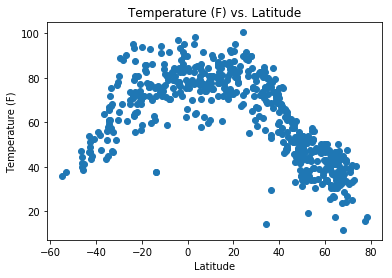

In [19]:
plt.scatter(df['Latitude'], df['Temperature'])
plt.title(f"Temperature (F) vs. Latitude")
plt.xlabel("Latitude")
plt.ylabel("Temperature (F)")
plt.savefig("Temperature.png")
plt.show()

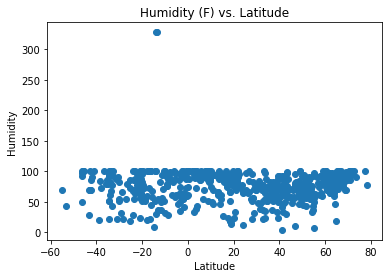

In [21]:
plt.scatter(df['Latitude'], df['Humidity'])
plt.title(f"Humidity (F) vs. Latitude")
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.savefig("Humidity.png")
plt.show()

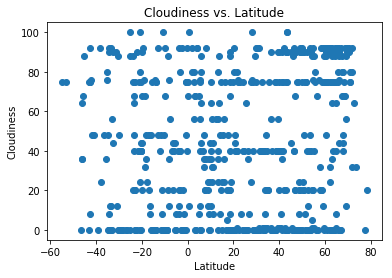

In [22]:
plt.scatter(df['Latitude'], df['Cloudiness'])
plt.title(f"Cloudiness vs. Latitude")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
# plt.style.use('ggplot')
plt.savefig("Cloudiness.png")
plt.show()

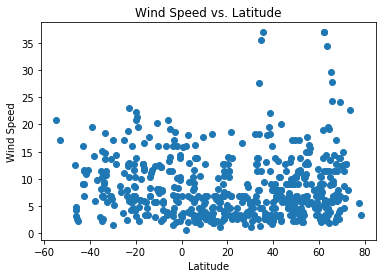

In [23]:
plt.scatter(df['Latitude'], df['Wind Speed'])
plt.title(f"Wind Speed vs. Latitude")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
# plt.style.use('ggplot')
plt.savefig("Wind Speed.png")
plt.show()